<h1 align='center'> Segmentación de clientes usando K-Means Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

Creación de dataset simulado de clientes

In [3]:
# Generando clientes con distintos patrones de gasto (Gasto mensual) y 
# frecuencia (número de compras promedio mensual)

np.random.seed(42) # Fijando una seed para que los valores generados sean consistentes al correr el código

# La creacion de los arrays de clientes va a seguir esta lógica
# Para clientes:segmento_1:
    # Generando datos aleatorios con distribucion normal (np.random.normal)
    # Con media 500 para la primer dimensión y 5 para la segunda (loc = [500,5])
    # Con desvío standard 50 para la primer dimensión y 1 para la segunda (scale = [ 50, 1 ])
    # Con tamaño de 100 filas, con  2 valores por filas (size = ( 100, 2 ))

clientes_segmento1 = np.random.normal( loc = [ 500, 5 ], scale = [ 50, 1 ], size = ( 100, 2 ))
clientes_segmento2 = np.random.normal( loc = [ 200, 10 ], scale = [ 30, 2 ], size = ( 80, 2 ))
clientes_segmento3 = np.random.normal( loc = [ 1000, 2 ], scale = [ 100, 0.5 ], size = ( 50, 2 ))

In [4]:
# Mostrando las priemras 5 filas de los arrays

print(f"{clientes_segmento1[:5]}\n")
print(f"{clientes_segmento2[:5]}\n")
print(clientes_segmento3[:5])

[[524.83570765   4.8617357 ]
 [532.38442691   6.52302986]
 [488.29233126   4.76586304]
 [578.96064078   5.76743473]
 [476.5262807    5.54256004]]

[[210.73362081  11.12156905]
 [232.4915373   12.1076041 ]
 [158.66991896   8.12434992]
 [215.45105802  11.0275719 ]
 [215.45143059  17.70546298]]

[[1051.93465142    2.76636946]
 [ 989.12398515    2.20085586]
 [1069.01439917    1.79938976]
 [1022.40924818    2.0062962 ]
 [1009.76760985    1.61349511]]


In [5]:
# Combinando arrays en un solo dataset

# Uniendo los 3 arrays verticalmente, formando uno solo de todas las entradas

clientes = np.vstack([clientes_segmento1, clientes_segmento2, clientes_segmento3])

# Creando un DataFrame a partir del array con etiquetas para sus columans

df_clientes = pd.DataFrame(clientes, columns=['Gasto mensual ($)', 'Frecuencia mensual'])

In [6]:
# Mostrando la composicion del array fusionado

clientes.shape

(230, 2)

In [7]:
# Mostrando las primeras 5 filas del DataFrame

df_clientes.head(5)

,Gasto mensual ($),Frecuencia mensual
0,524.835708,4.861736
1,532.384427,6.523030
2,488.292331,4.765863
3,578.960641,5.767435
4,476.526281,5.542560


Gráfico de Datos simulados

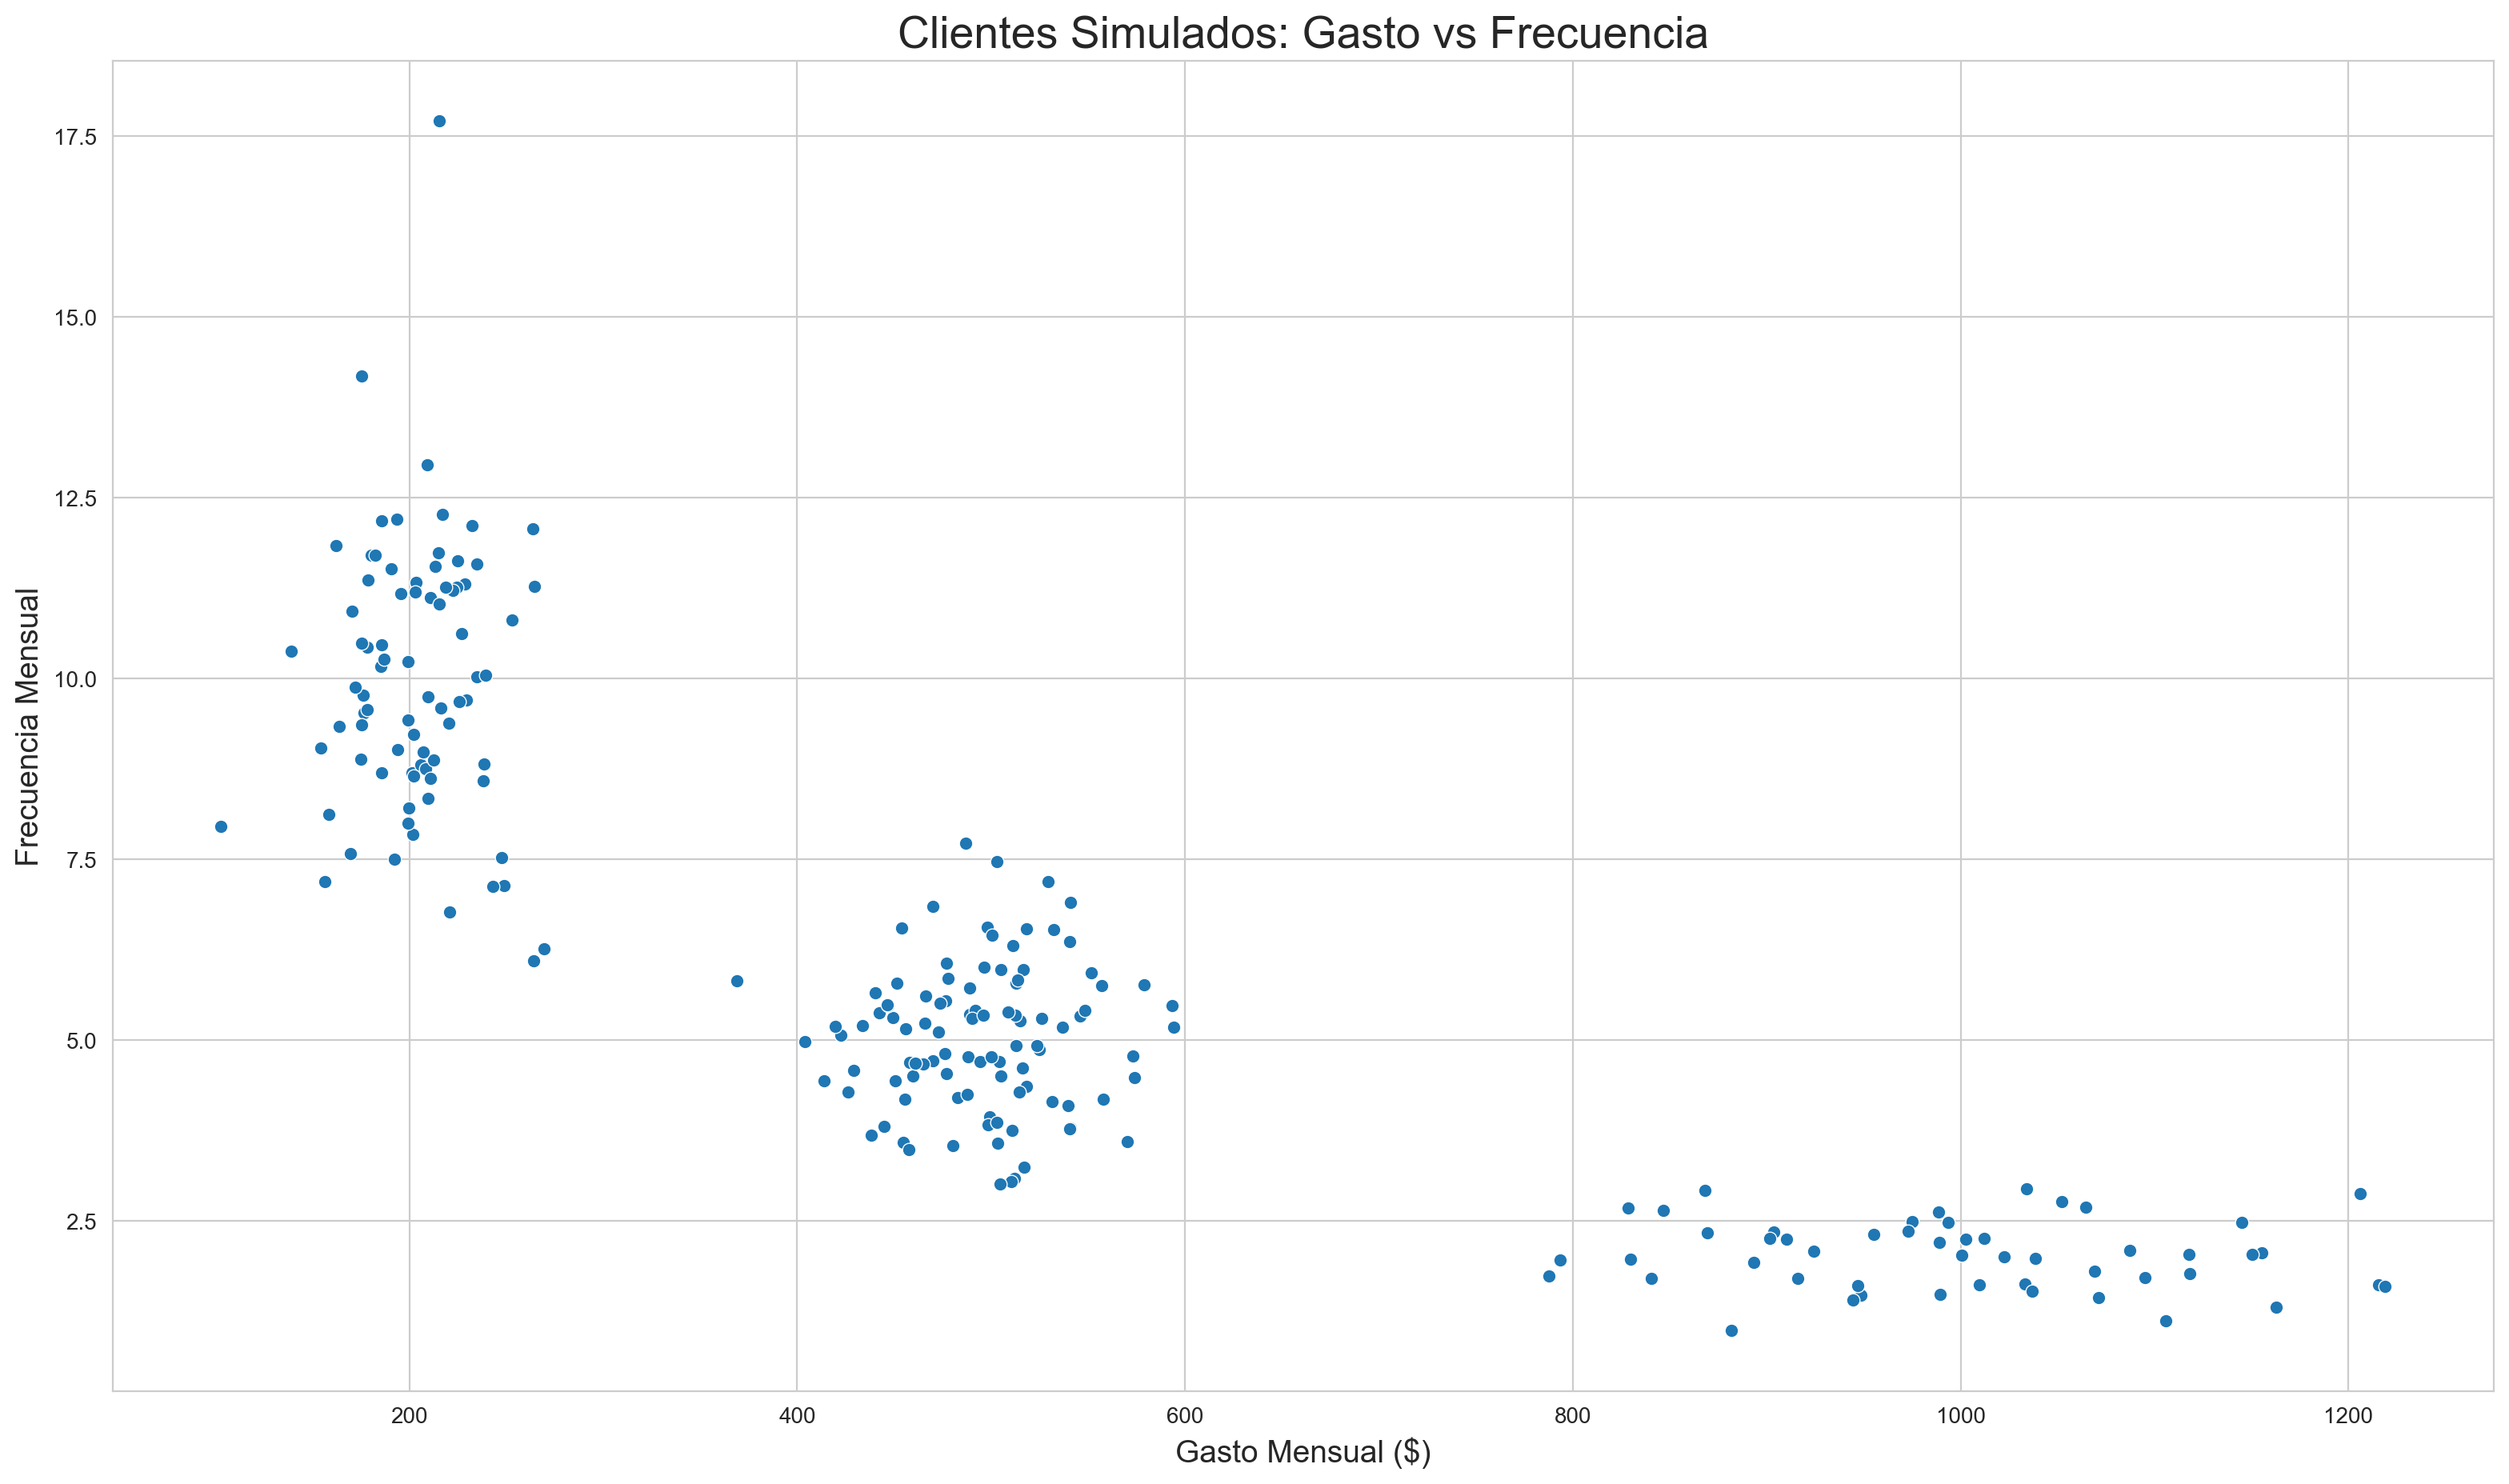

In [8]:
#  Gráfico de los Datos simulados

plt.figure(figsize=(19.2, 10.8), dpi=200)

sns.set_style('whitegrid')
sns.scatterplot(data=  df_clientes,
                x = 'Gasto mensual ($)', 
                y = 'Frecuencia mensual')

plt.title("Clientes Simulados: Gasto vs Frecuencia", size = 20)
plt.xlabel("Gasto Mensual ($)", size = 14)
plt.ylabel("Frecuencia Mensual", size = 14);

Estandarización de variables

In [9]:
# Creando un objecto con StandScaler, para transformar las variables y que tengan una distribución normal
scaler = StandardScaler()

# Transformando las variables
X_scaled = scaler.fit_transform(df_clientes)

In [10]:
# Muestra del DataFrame ahora convertido en un array bidimensional normalizado
X_scaled[:5]

array([[ 0.07413742, -0.37279094],
       [ 0.09953714,  0.12847751],
       [-0.04882271, -0.40171896],
       [ 0.25625547, -0.09951101],
       [-0.08841278, -0.16736328]])

Aplicando K-Means Clustering

In [11]:
# Creando el algoritmo de clustering especificando 3 clusters a formar y fijando la aleatoriedad
# Para obtener resultados consistentes

kmeans = KMeans(n_clusters=3, random_state=42)

# Entrenando el modelo. Creando los centroides para cada cluster y agrupando los puntos al rededor de lso centroides

kmeans.fit(X_scaled)

# Creando una columna para las etiquetas que el modelo le da a cada cluster

df_clientes['Cluster'] = kmeans.labels_

c:\Users\PC\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
# Mostrando las primeras 5 filas del Dataframe con la nueva columna Cluster

df_clientes.head(5)

,Gasto mensual ($),Frecuencia mensual,Cluster
0,524.835708,4.861736,0
1,532.384427,6.523030,0
2,488.292331,4.765863,0
3,578.960641,5.767435,0
4,476.526281,5.542560,0


Gráfico de Clusters

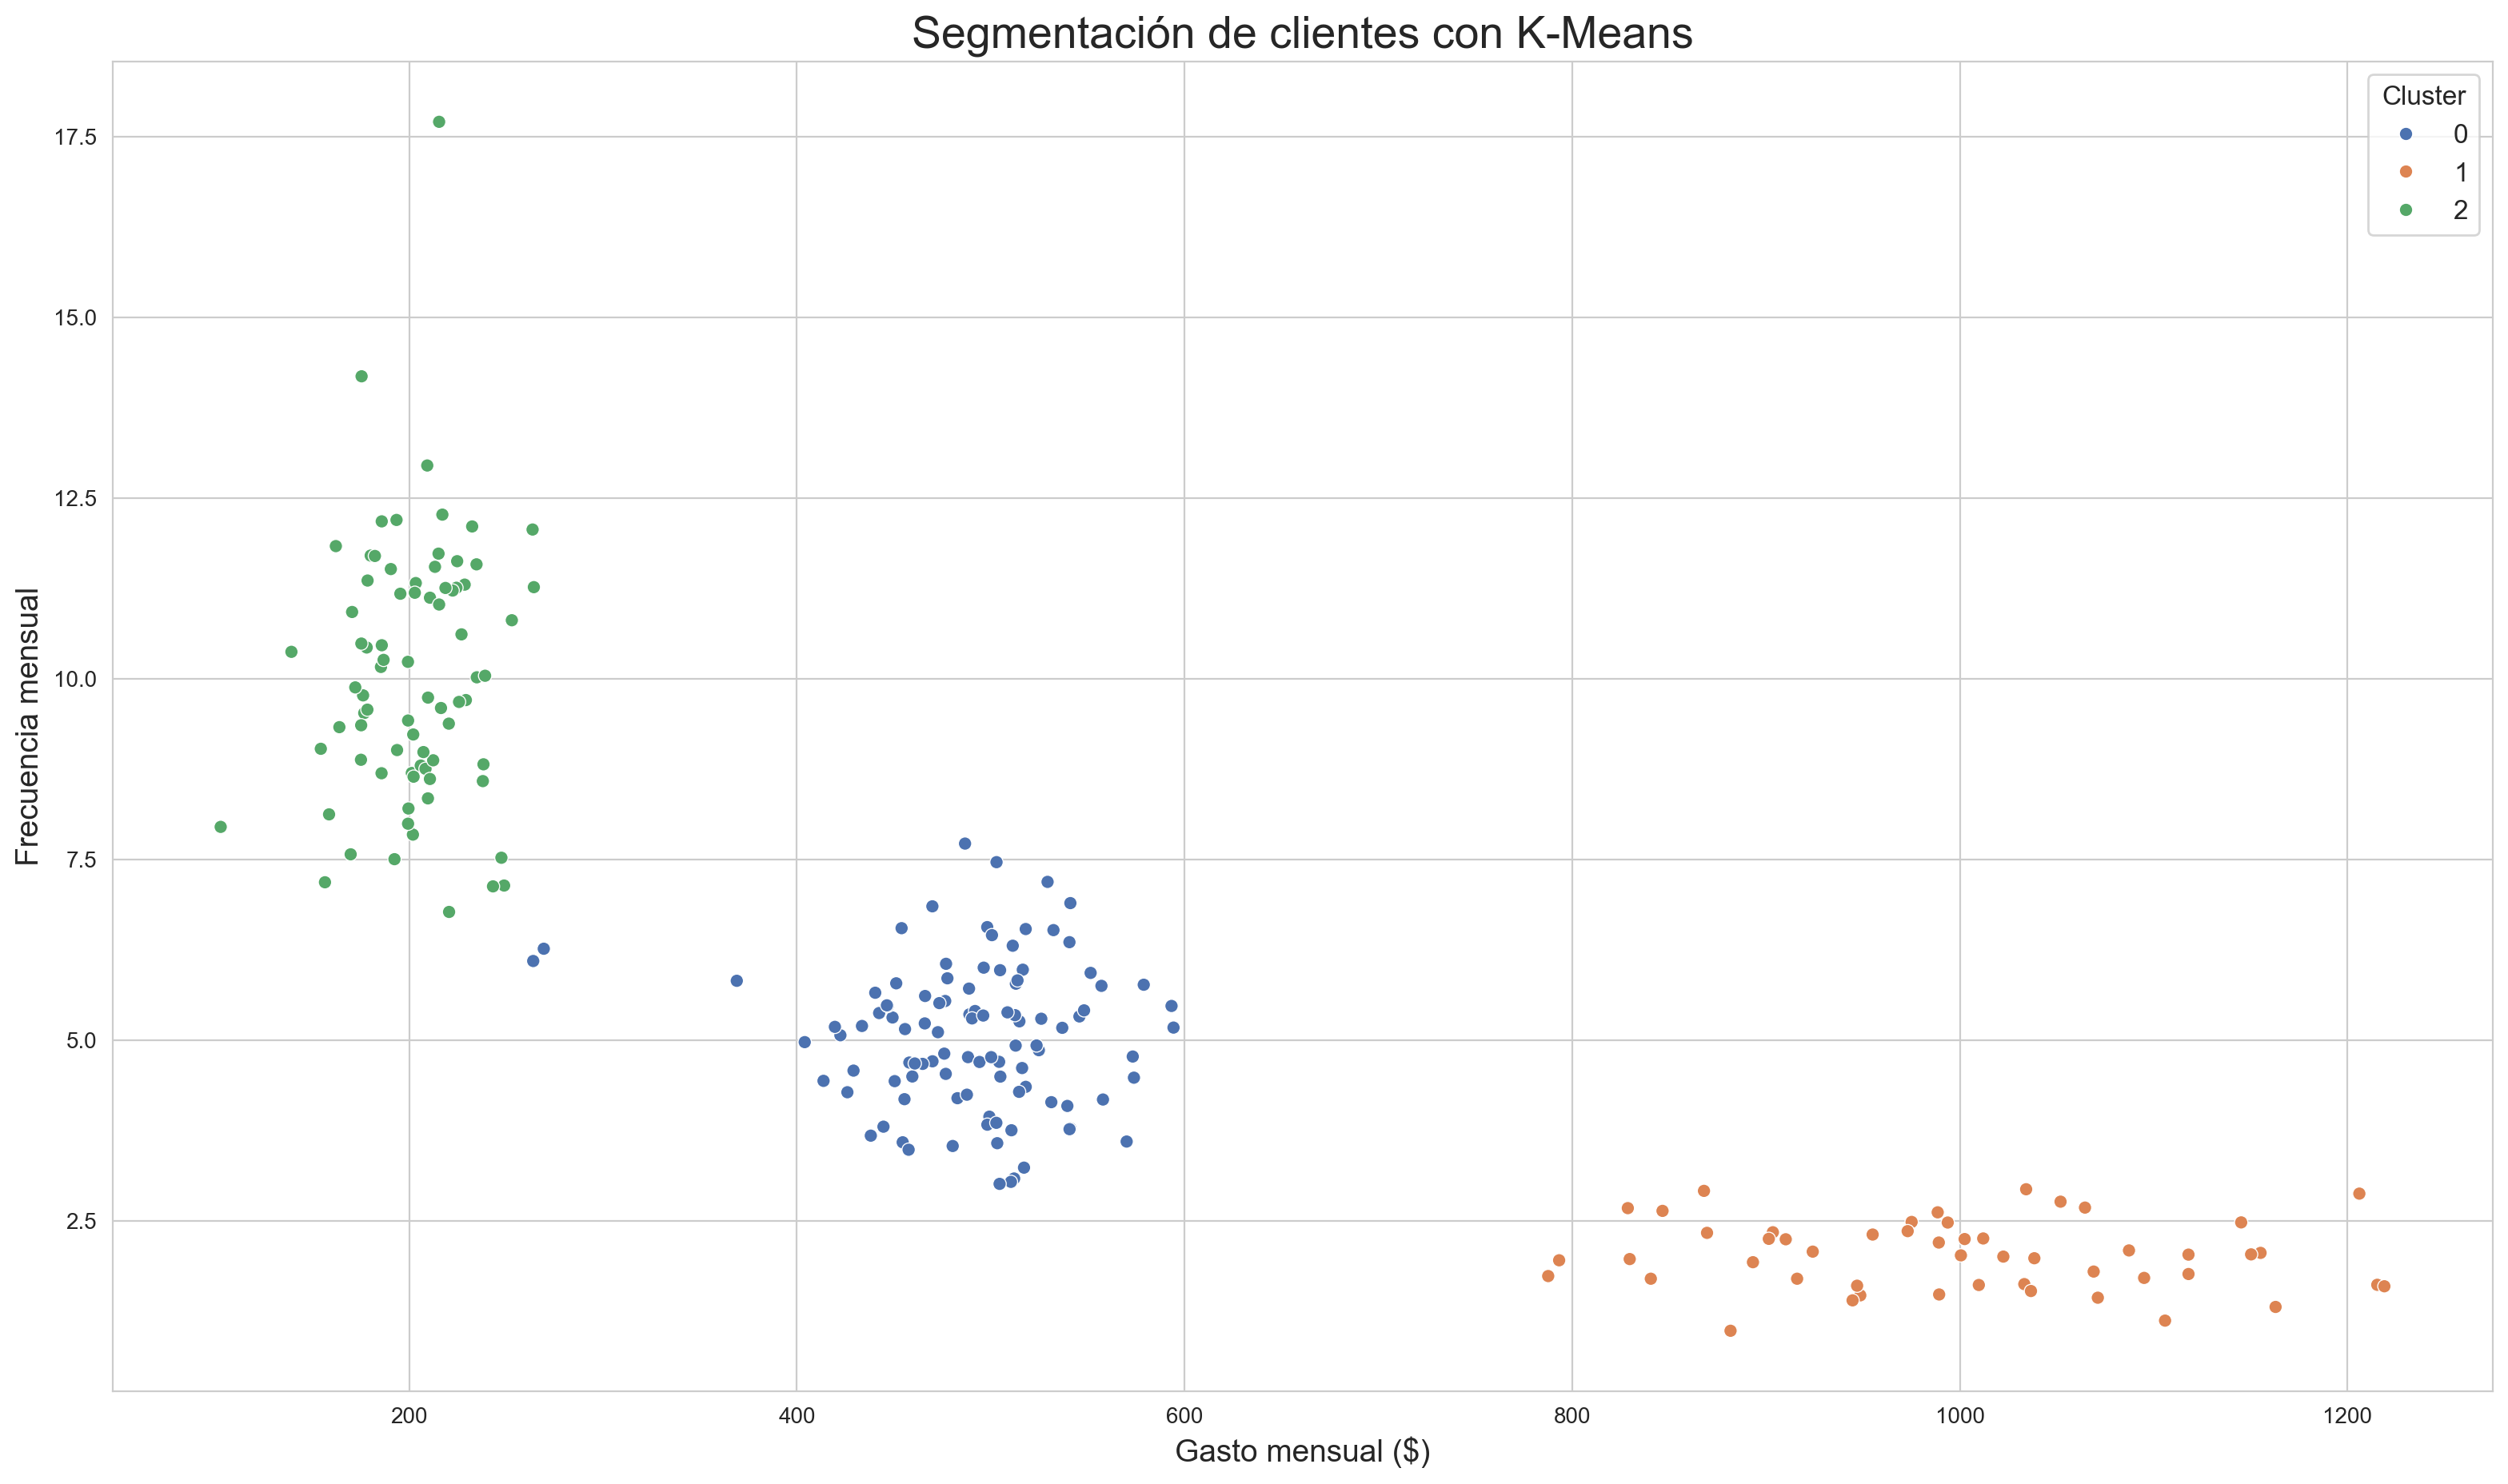

In [13]:
plt.figure(figsize=(19.2, 10.8), dpi=200)

sns.scatterplot(data=df_clientes,
                x='Gasto mensual ($)',
                y='Frecuencia mensual',
                hue='Cluster',
                palette='deep')

plt.title("Segmentación de clientes con K-Means", size = 20)
plt.xlabel("Gasto mensual ($)", size = 14)
plt.ylabel("Frecuencia mensual", size = 14)
plt.legend(title='Cluster', fontsize = 12, title_fontsize = 12);

In [14]:
# Usando un loop para crear un DataFrame a partir de cada cluster y analizarlo
# Indicando:
#   Cantidad de clientes ( número de filas)
#   Gasto Promedio ( Gasto promedio del DataFrame correspondiente al cluster)
#   Frecuencia promedio ( Frecuencia promedio del Dataframe correspondiente al cluster)

for i in range(3):
    cluster_i = df_clientes[df_clientes['Cluster'] == i]
    print(f"--- Cluster {i} ---")
    print("Cantidad de clientes:", cluster_i.shape[0])
    print("Gasto promedio: $", round(cluster_i['Gasto mensual ($)'].mean(), 2))
    print("Frecuencia promedio:", round(cluster_i['Frecuencia mensual'].mean(), 2))
    print()

--- Cluster 0 ---
Cantidad de clientes: 102
Gasto promedio: $ 489.76
Frecuencia promedio: 5.06

--- Cluster 1 ---
Cantidad de clientes: 50
Gasto promedio: $ 998.44
Frecuencia promedio: 2.03

--- Cluster 2 ---
Cantidad de clientes: 78
Gasto promedio: $ 202.14
Frecuencia promedio: 10.07



Usando el K-Means clustering podemos confirmar que los 3 grupos de clientes que vimos en el primer gráfico realmente tienen características distintas una vez aplicado el modelo.

<li> El Cluster 0 muestra un gasto moderado con una frecuencia moderada.
<li> El Cluster 1 muestra un gasto alto con baja frecuencia, pocas ordenes por un alto valor.
<li> El Cluster 2 muestra un gasto bajo con alta frecuencia, muchas ordenes de bajo valor.

En base a ésto se pueden proponer estrategias de ventas especificas orientadas a los habitos de consumo que puedimos observar en los grupos / clusters.

Cluster 0:
    <li> Campaña de fidelizacion para promover la lealtad a la marca como un programa de recompensas


Cluster 1:
    <li>Campaña de retención y fidelizacion buscando mantener a éstos clientes generando lealtad a la marca y evitar su migración hacia la competencia. Algunos ejemplos de ésto son: Programas de lealtad, Experiencias personalizadas, Atencion al cliente diferenciada.

Cluster 2: 
    <li>Up-Selling o Venta Adicional: Intentar convencer a los clientes para que compren una version superior o premium del producto que habitualmente compran.
    <li>Cross-Sellin o Venta Cruzada: Tratar de convencer a los clientes para que compren productos complementarios a los que habitualmente compran.